In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                     index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

In [7]:
frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


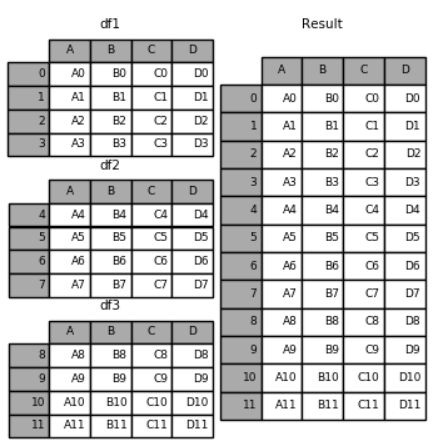

In [ ]:
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

### Concatenating objects

In [10]:
# hierarchical index(각 DF가 계층적 index로 묶인다)
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [ ]:
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)

### Set logic on the other axes

In [11]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [12]:
# Outer Join
result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [14]:
# Inner Join : 겹치는 index에 대해서만 결합
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [16]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [15]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### Concatenating using (append)

In [18]:
result = df1.append(df2)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [21]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [20]:
# 컬럼이 일치 하지 않으면 NaN 으로 내용이 채워진다.
result = df1.append(df4)
result

C:\Anaconda3\envs\ml_scratch\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [23]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [22]:
# 원본 df1이 변경되지는 않는다.
result = df1.append([df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [24]:
# df4의 기존 index는 무시하고, 순차적으로 정의된다.
result = df1.append(df4, ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### Concatenating with mixed ndims

In [26]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
result = pd.concat([df1, s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [27]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])
result = pd.concat([df1, s2, s2, s2], axis=1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


In [28]:
result = pd.concat([df1, s1], axis=1, ignore_index=True)
result

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


### More concatenating with group keys

In [29]:
s3 = pd.Series([0, 1, 2, 3], name='foo')
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 5])
pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [30]:
pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [31]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [32]:
pieces = {'x': df1, 'y': df2, 'z': df3}
result = pd.concat(pieces)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [35]:
result = pd.concat(pieces, keys=['z', 'y'])
result.index.levels

FrozenList([['z', 'y'], [4, 5, 6, 7, 8, 9, 10, 11]])

In [38]:
result = pd.concat(pieces, keys=['x', 'y', 'z'],
                levels=[['z', 'y', 'x', 'w']],
                names=['group_key'])
result

A    B    C    D
group_key                       
x         0    A0   B0   C0   D0
          1    A1   B1   C1   D1
          2    A2   B2   C2   D2
          3    A3   B3   C3   D3
y         4    A4   B4   C4   D4
          5    A5   B5   C5   D5
          6    A6   B6   C6   D6
          7    A7   B7   C7   D7
z         8    A8   B8   C8   D8
          9    A9   B9   C9   D9
          10  A10  B10  C10  D10
          11  A11  B11  C11  D11

In [39]:
result.index.levels

FrozenList([['z', 'y', 'x', 'w'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

### Appending rows to a DataFrame

In [40]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
df1.append(s2, ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


In [41]:
dicts = [{'A': 1, 'B': 2, 'C': 3, 'X': 4},
         {'A': 5, 'B': 6, 'C': 7, 'Y': 8}]
df1.append(dicts, ignore_index=True)

C:\Anaconda3\envs\ml_scratch\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C,D,X,Y
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
4,1,2,3,NaN,4.0,NaN
5,5,6,7,NaN,NaN,8.0


### Database-style DataFrame joining/merging

In [42]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

In [43]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [45]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [46]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


result = pd.merge(left, right, on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


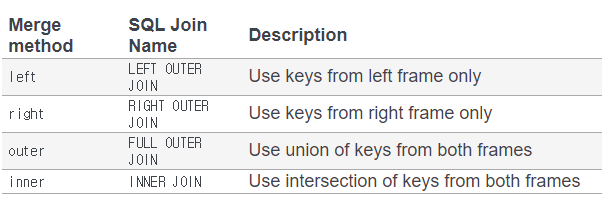

In [48]:
# LEFT OUTER JOIN
result = pd.merge(left, right, how='left', on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [49]:
# RIGHT OUTER JOIN
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [50]:
# FULL OUTER JOIN
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [51]:
pd.merge(left, right, how='inner', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [52]:
left = pd.DataFrame({'A' : [1,2], 'B' : [2, 2]})
right = pd.DataFrame({'A' : [4,5,6], 'B': [2,2,2]})
pd.merge(left, right, on='B', how='outer')

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


### Checking for duplicate keys

In [54]:
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})
right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})
pd.merge(left, right, on='B', how='outer', validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


### The merge indicator

In [55]:
df1 = pd.DataFrame({'col1': [0, 1], 'col_left':['a', 'b']})
df2 = pd.DataFrame({'col1': [1, 2, 2],'col_right':[2, 2, 2]})
pd.merge(df1, df2, on='col1', how='outer', indicator=True)

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [56]:
pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')

,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


### Merge Dtypes

In [57]:
left = pd.DataFrame({'key': [1], 'v1': [10]})
left

,key,v1
0,1,10


In [58]:
right = pd.DataFrame({'key': [1, 2], 'v1': [20, 30]})
right

,key,v1
0,1,20
1,2,30


In [59]:
pd.merge(left, right, how='outer')

,key,v1
0,1,10
1,1,20
2,2,30


In [61]:
pd.merge(left, right, how='outer').dtypes

key    int64
v1     int64
dtype: object

In [62]:
pd.merge(left, right, how='outer', on='key')

,key,v1_x,v1_y
0,1,10.0,20
1,2,NaN,30


In [63]:
pd.merge(left, right, how='outer', on='key').dtypes

key       int64
v1_x    float64
v1_y      int64
dtype: object

In [66]:
from pandas.api.types import CategoricalDtype
import numpy as np
X = pd.Series(np.random.choice(['foo', 'bar'], size=(10,)))
X = X.astype(CategoricalDtype(categories=['foo', 'bar']))
left = pd.DataFrame({'X': X,
                     'Y': np.random.choice(['one', 'two', 'three'], size=(10,))})

left

,X,Y
0,bar,two
1,foo,two
2,bar,three
3,foo,one
4,foo,one
5,foo,two
6,bar,one
7,bar,three
8,bar,two
9,foo,one


In [67]:
left.dtypes

X    category
Y      object
dtype: object

In [68]:
right = pd.DataFrame({
     'X': pd.Series(['foo', 'bar'],
                    dtype=CategoricalDtype(['foo', 'bar'])),
     'Z': [1, 2]
})
right

,X,Z
0,foo,1
1,bar,2


In [69]:
right.dtypes

X    category
Z       int64
dtype: object

In [72]:
result = pd.merge(left, right, how='outer')
result

,X,Y,Z
0,bar,two,2
1,bar,three,2
2,bar,one,2
3,bar,three,2
4,bar,two,2
5,foo,two,1
6,foo,one,1
7,foo,one,1
8,foo,two,1
9,foo,one,1


In [73]:
result.dtypes

X    category
Y      object
Z       int64
dtype: object

### Joining on index

In [79]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [80]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [78]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [81]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [83]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


### Joining key columns on an index

In [84]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']})

right = pd.DataFrame({'C': ['C0', 'C1'],
                      'D': ['D0', 'D1']},
                      index=['K0', 'K1'])

result = left.join(right, on='key')
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [86]:
result = pd.merge(left, right, left_on='key', right_index=True,
                  how='left', sort=False)
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [87]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1']})

index = pd.MultiIndex.from_tuples([('K0', 'K0'), ('K1', 'K0'),
                                  ('K2', 'K0'), ('K2', 'K1')])

right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=index)

result = left.join(right, on=['key1', 'key2'])
result

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


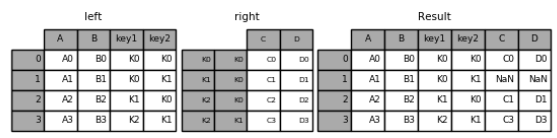

In [88]:
result = left.join(right, on=['key1', 'key2'], how='inner')
result

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


### Joining a single Index to a Multi-index

In [89]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=pd.Index(['K0', 'K1', 'K2'], name='key'))

index = pd.MultiIndex.from_tuples([('K0', 'Y0'), ('K1', 'Y1'),
                                  ('K2', 'Y2'), ('K2', 'Y3')],
                                   names=['key', 'Y'])

right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']},
                      index=index)

result = left.join(right, how='inner')
result

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

In [90]:
result = pd.merge(left.reset_index(), right.reset_index(),
      on=['key'], how='inner').set_index(['key','Y'])
result

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

### Joining with two multi-indexes

In [91]:
index = pd.MultiIndex.from_tuples([('K0', 'X0'), ('K0', 'X1'),
                                   ('K1', 'X2')],
                                    names=['key', 'X'])

left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=index)

result = pd.merge(left.reset_index(), right.reset_index(),
                  on=['key'], how='inner').set_index(['key','X','Y'])

result

A   B   C   D
key X  Y                 
K0  X0 Y0  A0  B0  C0  D0
    X1 Y0  A1  B1  C0  D0
K1  X2 Y1  A2  B2  C1  D1

### Merging on a combination of columns and index levels

In [92]:
left_index = pd.Index(['K0', 'K0', 'K1', 'K2'], name='key1')
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key2': ['K0', 'K1', 'K0', 'K1']},
                    index=left_index)

right_index = pd.Index(['K0', 'K1', 'K2', 'K2'], name='key1')
right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3'],
                      'key2': ['K0', 'K0', 'K0', 'K1']},
                     index=right_index)

result = left.merge(right, on=['key1', 'key2'])
result

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3


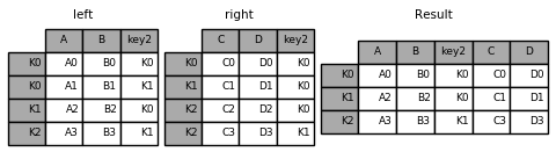

### Overlapping value columns

In [93]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'v': [1, 2, 3]})
right = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'v': [4, 5, 6]})
pd.merge(left, right, on='k')

,k,v_x,v_y
0,K0,1,4
1,K0,1,5


In [94]:
pd.merge(left, right, on='k', suffixes=['_l', '_r'])

,k,v_l,v_r
0,K0,1,4
1,K0,1,5


In [95]:
left = left.set_index('k')
right = right.set_index('k')
left.join(right, lsuffix='_l', rsuffix='_r')

,v_l,v_r
k,,
K0,1,4.0
K0,1,5.0
K1,2,NaN
K2,3,NaN


### Joining multiple DataFrame or Panel objects

In [96]:
right2 = pd.DataFrame({'v': [7, 8, 9]}, index=['K1', 'K1', 'K2'])
left.join([right, right2])

,v_x,v_y,v
K0,1,4.0,NaN
K0,1,5.0,NaN
K1,2,NaN,7.0
K1,2,NaN,8.0
K2,3,NaN,9.0


### Merging together values within Series or DataFrame columns

In [97]:
df1 = pd.DataFrame([[np.nan, 3., 5.], [-4.6, np.nan, np.nan],
                   [np.nan, 7., np.nan]])

df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5., 1.6, 4]],
                   index=[1, 2])

df1.combine_first(df2)

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [99]:
df1.update(df2)
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


### Timeseries friendly merging
### Merging Ordered Data

In [100]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K1', 'K2'],
                     'lv': [1, 2, 3, 4],
                     's': ['a', 'b', 'c', 'd']})

right = pd.DataFrame({'k': ['K1', 'K2', 'K4'],
                      'rv': [1, 2, 3]})

pd.merge_ordered(left, right, fill_method='ffill', left_by='s')

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


### Merging AsOf

In [102]:
trades = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.038',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048']),
    'ticker': ['MSFT', 'MSFT',
               'GOOG', 'GOOG', 'AAPL'],
    'price': [51.95, 51.95,
              720.77, 720.92, 98.00],
    'quantity': [75, 155,
                 100, 100, 100]},
    columns=['time', 'ticker', 'price', 'quantity'])

quotes = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.023',
                            '20160525 13:30:00.030',
                            '20160525 13:30:00.041',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.049',
                            '20160525 13:30:00.072',
                            '20160525 13:30:00.075']),
    'ticker': ['GOOG', 'MSFT', 'MSFT',
               'MSFT', 'GOOG', 'AAPL', 'GOOG',
               'MSFT'],
    'bid': [720.50, 51.95, 51.97, 51.99,
            720.50, 97.99, 720.50, 52.01],
    'ask': [720.93, 51.96, 51.98, 52.00,
            720.93, 98.01, 720.88, 52.03]},
    columns=['time', 'ticker', 'bid', 'ask'])

trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [103]:
quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [104]:
pd.merge_asof(trades, quotes,
              on='time',
              by='ticker')

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [105]:
pd.merge_asof(trades, quotes,
              on='time',
              by='ticker',
              tolerance=pd.Timedelta('2ms'))

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,NaN,NaN
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [106]:
pd.merge_asof(trades, quotes,
              on='time',
              by='ticker',
              tolerance=pd.Timedelta('10ms'),
              allow_exact_matches=False)

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,NaN,NaN
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,NaN,NaN
3,2016-05-25 13:30:00.048,GOOG,720.92,100,NaN,NaN
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN
